In [ ]:
# import pandas as pd
# import numpy as np

# meth = pd.read_csv("data_methylation_hm450.txt", sep='\t')

# genes_used_in_mean_meth_paper = pd.read_csv('C:/Users/mmarc/Documents/code/P-Net-Reproducibility-Paper-Fork/all_genes_from_beta_data.txt')
# gene_list = genes_used_in_mean_meth_paper.iloc[:, 0].astype(str).tolist()

# meth['Hugo_Symbol'] = meth['Hugo_Symbol'].str.upper()
# gene_list_upper = [gene.upper() for gene in gene_list]

# print(f"before: {len(meth)}")
# meth = meth[meth['Hugo_Symbol'].isin(gene_list_upper)].reset_index(drop=True)
# print(f"after: {len(meth)}")

# print(f"list length {len(gene_list)}")

before: 25883
after: 19589
list length 20248


In [67]:
df = pd.read_csv('aggreagated_ccle_meth.csv')
df.set_index('Gene', inplace=True)

df

,22RV1_PROSTATE,2313287_STOMACH,253J_URINARY_TRACT,42MGBA_CENTRAL_NERVOUS_SYSTEM,5637_URINARY_TRACT,639V_URINARY_TRACT,647V_URINARY_TRACT,697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,769P_KIDNEY,786O_KIDNEY,...,WSUDLCL2_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,YAPC_PANCREAS,YD10B_UPPER_AERODIGESTIVE_TRACT,YD15_SALIVARY_GLAND,YD38_UPPER_AERODIGESTIVE_TRACT,YD8_UPPER_AERODIGESTIVE_TRACT,YH13_CENTRAL_NERVOUS_SYSTEM,YKG1_CENTRAL_NERVOUS_SYSTEM,ZR751_BREAST,ZR7530_BREAST
Gene,,,,,,,,,,,,,,,,,,,,,
A1BG,0.700977,0.292737,0.948531,0.729255,0.563342,0.690065,0.555697,0.721128,0.647612,0.615722,...,0.713275,0.833284,0.779894,0.611966,0.588276,0.794775,0.655867,0.499400,0.689347,0.680597
A1BG-AS1,0.864430,0.325102,1.000000,0.964366,0.661393,0.928355,0.694338,0.924852,0.728296,0.659990,...,0.949071,0.870708,0.749844,0.725060,0.634088,0.947149,0.814730,0.703187,0.931171,0.877421
A2M-AS1,0.487984,0.225840,0.864180,0.650941,0.363861,0.332170,0.297620,0.927886,0.501806,0.524130,...,0.928240,0.291064,0.444363,0.459364,0.339701,0.401069,0.447277,0.543056,0.282060,0.557086
A2ML1,0.811535,0.214016,0.749033,0.362362,0.728373,0.653240,0.624993,0.950790,0.565398,0.491657,...,0.275778,0.788294,0.631718,0.861452,0.719114,0.862180,0.595340,0.272608,0.718046,0.699710
A3GALT2,0.945782,0.547574,0.919390,0.895300,0.744416,0.916710,0.811513,0.737548,0.770234,0.702200,...,0.558084,0.965063,0.873890,0.834528,0.774532,0.883137,0.808708,0.709664,0.831622,0.805736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,0.308764,0.447938,0.019467,0.866186,0.537378,0.497297,0.094634,0.710938,0.018079,0.825872,...,0.266128,0.019544,0.818402,0.262884,0.726856,0.570759,0.593241,0.430826,0.041164,0.015894
ZYG11B,0.033550,0.000000,0.000000,0.006240,0.000000,0.130855,0.000000,0.000000,0.000000,0.000820,...,0.000000,0.009135,0.000000,0.000000,0.003435,0.000000,0.000000,0.002605,0.000000,0.002935
ZYX,0.547548,0.343440,0.313680,0.180675,0.281527,0.152202,0.311670,0.537375,0.167360,0.263250,...,0.343487,0.424050,0.270750,0.332412,0.320827,0.280137,0.171788,0.239782,0.461952,0.456492


In [68]:
import pandas as pd
import numpy as np

wd = "C:/Users/mmarc/Documents/code/P-Net-Reproducibility-Paper-Fork/Radiosensitivity Prediction/data"

df = pd.read_csv('aggreagated_ccle_meth.csv')
df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda x : pd.to_numeric(x, errors="coerce")).fillna(np.nan)
df = df.groupby("Gene").mean().T
df.index = [x.split("_")[0] for x in df.index]
df = df.loc[~df.index.duplicated(keep="first")]
df = df.T
df.head()

meth = df

In [69]:
meth

,22RV1,2313287,253J,42MGBA,5637,639V,647V,697,769P,786O,...,WSUDLCL2,YAPC,YD10B,YD15,YD38,YD8,YH13,YKG1,ZR751,ZR7530
Gene,,,,,,,,,,,,,,,,,,,,,
A1BG,0.700977,0.292737,0.948531,0.729255,0.563342,0.690065,0.555697,0.721128,0.647612,0.615722,...,0.713275,0.833284,0.779894,0.611966,0.588276,0.794775,0.655867,0.499400,0.689347,0.680597
A1BG-AS1,0.864430,0.325102,1.000000,0.964366,0.661393,0.928355,0.694338,0.924852,0.728296,0.659990,...,0.949071,0.870708,0.749844,0.725060,0.634088,0.947149,0.814730,0.703187,0.931171,0.877421
A2M-AS1,0.487984,0.225840,0.864180,0.650941,0.363861,0.332170,0.297620,0.927886,0.501806,0.524130,...,0.928240,0.291064,0.444363,0.459364,0.339701,0.401069,0.447277,0.543056,0.282060,0.557086
A2ML1,0.811535,0.214016,0.749033,0.362362,0.728373,0.653240,0.624993,0.950790,0.565398,0.491657,...,0.275778,0.788294,0.631718,0.861452,0.719114,0.862180,0.595340,0.272608,0.718046,0.699710
A3GALT2,0.945782,0.547574,0.919390,0.895300,0.744416,0.916710,0.811513,0.737548,0.770234,0.702200,...,0.558084,0.965063,0.873890,0.834528,0.774532,0.883137,0.808708,0.709664,0.831622,0.805736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,0.308764,0.447938,0.019467,0.866186,0.537378,0.497297,0.094634,0.710938,0.018079,0.825872,...,0.266128,0.019544,0.818402,0.262884,0.726856,0.570759,0.593241,0.430826,0.041164,0.015894
ZYG11B,0.033550,0.000000,0.000000,0.006240,0.000000,0.130855,0.000000,0.000000,0.000000,0.000820,...,0.000000,0.009135,0.000000,0.000000,0.003435,0.000000,0.000000,0.002605,0.000000,0.002935
ZYX,0.547548,0.343440,0.313680,0.180675,0.281527,0.152202,0.311670,0.537375,0.167360,0.263250,...,0.343487,0.424050,0.270750,0.332412,0.320827,0.280137,0.171788,0.239782,0.461952,0.456492


In [89]:
genes_used_in_mean_meth_paper = pd.read_csv('all_genes_from_beta_data.txt')
gene_list = genes_used_in_mean_meth_paper.iloc[:, 0].astype(str).tolist()

meth.index = meth.index.str.upper()
gene_list_upper = [gene.upper() for gene in gene_list]

print(f"before: {len(meth)}")
meth = meth[meth.index.isin(gene_list_upper)].reset_index(drop=True)
print(f"after: {len(meth)}")

print(f"list length {len(gene_list)}")

before: 22502
after: 15008
list length 20248


In [90]:

means = meth.mean(skipna=True)
means

22RV1      0.298771
2313287    0.261143
253J       0.408695
42MGBA     0.366347
5637       0.313422
             ...   
YD8        0.401307
YH13       0.250337
YKG1       0.273469
ZR751      0.345631
ZR7530     0.371435
Length: 842, dtype: float64

In [91]:
info = pd.read_csv(f'{wd}/Cleveland/cleveland_sampleInfo.csv')
info.head()

,CellLine,Primarysite,Histology,Subhistology
0,SKNFI,autonomic_ganglia,neuroblastoma,NS
1,IMR32,autonomic_ganglia,neuroblastoma,NS
2,SKNAS,autonomic_ganglia,neuroblastoma,NS
3,CHP212,autonomic_ganglia,neuroblastoma,NS
4,KPNSI9S,autonomic_ganglia,neuroblastoma,NS


In [92]:
df = pd.read_csv('C:/Users/mmarc/Documents/code/P-Net-Reproducibility-Paper-Fork/Radiosensitivity Prediction/data/Cleveland/cleveland_auc_only.csv')
df.head()

,id,auc
0,SKNFI,2.861642
1,IMR32,0.549051
2,SKNAS,3.258931
3,CHP212,1.344093
4,KPNSI9S,2.325173


In [93]:
np.median(means.values)

0.33502014080532105

In [94]:
df['mean_methylation'] = [means[pdx] if pdx in means else np.nan for pdx in df['id']]
df = df[df['mean_methylation'].notna()]
df

,id,auc,mean_methylation
0,SKNFI,2.861642,0.315439
1,IMR32,0.549051,0.325696
2,SKNAS,3.258931,0.286236
3,CHP212,1.344093,0.332608
4,KPNSI9S,2.325173,0.321513
...,...,...,...
504,SF268,2.327168,0.316103
505,HOP62,1.539943,0.344037
506,WM983B,2.886021,0.331078
507,PECAPJ34CLONEC12,2.190759,0.338043


## Plot division:

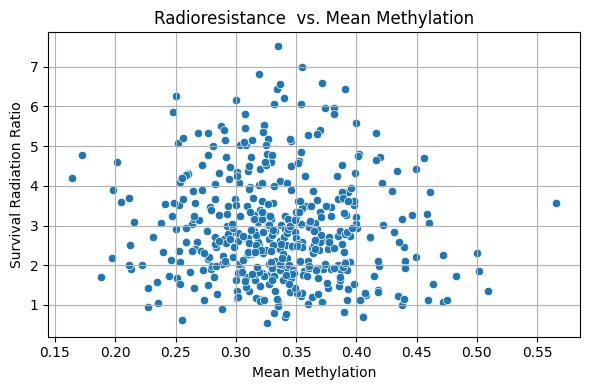

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='mean_methylation', y='auc')
plt.title("Radioresistance  vs. Mean Methylation")
plt.xlabel("Mean Methylation")
plt.ylabel("Survival Radiation Ratio")
# plt.legend(title="Class\n(1=Resistant)")
plt.grid(True)
plt.tight_layout()
plt.show()


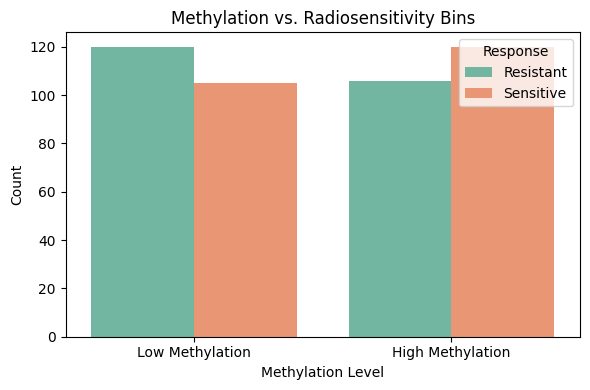

In [96]:
plot_df = df
# Create categorical bins
meth_median = plot_df['mean_methylation'].median()
auc_median = plot_df['auc'].median()

plot_df['methylation_bin'] = (plot_df['mean_methylation'] >= meth_median).map({True: 'High Methylation', False: 'Low Methylation'})
plot_df['auc_bin'] = (plot_df['auc'] >= auc_median).map({True: 'Resistant', False: 'Sensitive'})

plt.figure(figsize=(6, 4))
sns.countplot(data=plot_df, x='methylation_bin', hue='auc_bin', palette='Set2')
plt.title("Methylation vs. Radiosensitivity Bins")
plt.xlabel("Methylation Level")
plt.ylabel("Count")
plt.legend(title="Response")
plt.tight_layout()
plt.show()


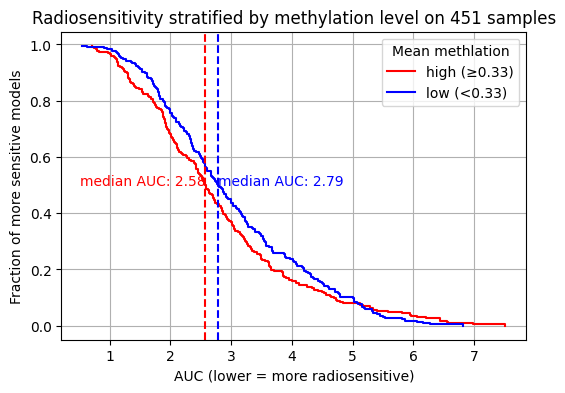

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

therapy = "auc"

specific = df


# Example arrays
auc = np.array(specific[therapy].values.ravel())

methylation = np.array(specific['mean_methylation'].values.ravel())

threshold = np.median(methylation)
group_high = methylation >= threshold
group_low = methylation < threshold

auc_high = auc[group_high]
auc_low = auc[group_low]

def pseudo_km_curve(auc_values):
    auc_sorted = np.sort(auc_values)
    surv_prob = 1 - np.arange(1, len(auc_sorted)+1) / len(auc_sorted)
    return auc_sorted, surv_prob

auc_h, surv_h = pseudo_km_curve(auc_high)
auc_l, surv_l = pseudo_km_curve(auc_low)

plt.figure(figsize=(6, 4))

plt.step(auc_h, surv_h, where="post", color="red", label=f"high (≥{threshold:.2f})")
plt.step(auc_l, surv_l, where="post", color="blue", label=f"low (<{threshold:.2f})")

# Annotate medians
median_h = np.median(auc_high)
median_l = np.median(auc_low)
plt.axvline(median_h, color="red", linestyle="--")
plt.axvline(median_l, color="blue", linestyle="--")
plt.text(median_h, 0.5, f"median AUC: {median_h:.2f}", color="red", ha="right")
plt.text(median_l, 0.5, f"median AUC: {median_l:.2f}", color="blue", ha="left")

plt.xlabel("AUC (lower = more radiosensitive)")
plt.ylabel("Fraction of more sensitive models")
plt.title(f"Radiosensitivity stratified by methylation level on {len(specific)} samples")
plt.legend(title = "Mean methlation")
plt.grid(True)
plt.show()


## Version with best threshold

In [78]:
df

,id,auc,mean_methylation,methylation_bin,auc_bin
0,SKNFI,2.861642,0.333022,Low Methylation,Resistant
1,IMR32,0.549051,0.351909,Low Methylation,Sensitive
2,SKNAS,3.258931,0.307120,Low Methylation,Resistant
3,CHP212,1.344093,0.361450,High Methylation,Sensitive
4,KPNSI9S,2.325173,0.344703,Low Methylation,Sensitive
...,...,...,...,...,...
504,SF268,2.327168,0.330370,Low Methylation,Sensitive
505,HOP62,1.539943,0.363697,High Methylation,Sensitive
506,WM983B,2.886021,0.348324,Low Methylation,Resistant
507,PECAPJ34CLONEC12,2.190759,0.363053,High Methylation,Sensitive


In [98]:
merged = (
    info.set_index("CellLine")
    .join(df.set_index("id")) 
)
merged

,Primarysite,Histology,Subhistology,auc,mean_methylation,methylation_bin,auc_bin
CellLine,,,,,,,
SKNFI,autonomic_ganglia,neuroblastoma,NS,2.861642,0.315439,Low Methylation,Resistant
IMR32,autonomic_ganglia,neuroblastoma,NS,0.549051,0.325696,Low Methylation,Sensitive
SKNAS,autonomic_ganglia,neuroblastoma,NS,3.258931,0.286236,Low Methylation,Resistant
CHP212,autonomic_ganglia,neuroblastoma,NS,1.344093,0.332608,High Methylation,Sensitive
KPNSI9S,autonomic_ganglia,neuroblastoma,NS,2.325173,0.321513,Low Methylation,Sensitive
...,...,...,...,...,...,...,...
WM983B,NaN,NaN,NaN,2.886021,0.331078,Low Methylation,Resistant
PECAPJ34CLONEC12,NaN,NaN,NaN,2.190759,0.338043,High Methylation,Sensitive
PECAPJ41CLONED2,NaN,NaN,NaN,1.427756,0.265450,Low Methylation,Sensitive


In [99]:
merged['Primarysite'].value_counts()

Primarysite
lung                         96
large_intestine              40
ovary                        38
central_nervous_system       34
skin                         32
pancreas                     31
breast                       26
oesophagus                   23
upper_aerodigestive_tract    22
endometrium                  21
liver                        20
stomach                      19
urinary_tract                19
kidney                       16
soft_tissue                  15
bone                         12
thyroid                       8
pleura                        7
autonomic_ganglia             7
biliary_tract                 5
prostate                      4
salivary_gland                2
Name: count, dtype: int64

## Figure 4.C.

Sensitivity threshold used: 2.86644782704569


C:\Users\mmarc\AppData\Local\Temp\ipykernel_41296\4168799411.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='sensitivity', y=methyl_col, data=df, palette={'sensitive': 'red', 'resistant': 'blue'}, width=0.5, fliersize=0)


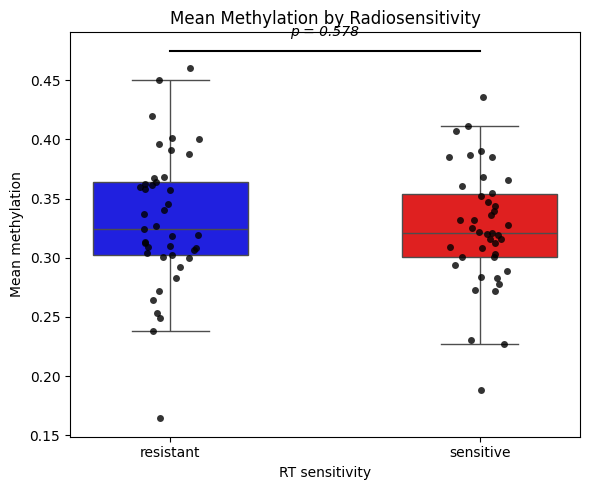

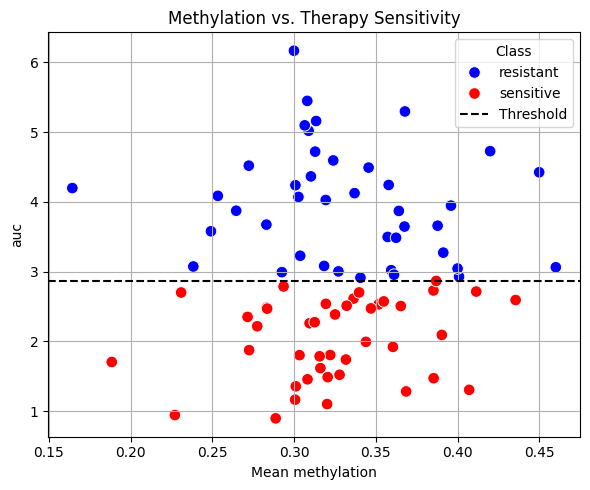

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

def plot_methylation_vs_sensitivity(df, therapy_col='auc', methyl_col='mean_methylation', threshold=None):
    df = df.copy()

    # Ensure columns are numeric and drop rows with NaNs or non-numeric values
    df[therapy_col] = pd.to_numeric(df[therapy_col], errors='coerce')
    df[methyl_col] = pd.to_numeric(df[methyl_col], errors='coerce')
    df.dropna(subset=[therapy_col, methyl_col], inplace=True)

    # Determine threshold
    if threshold is None:
        threshold = df[therapy_col].median()
    print(f"Sensitivity threshold used: {threshold}")



    # Assign sensitivity class based on threshold
    df = df.copy()
    df['sensitivity'] = np.where(df[therapy_col] <= threshold, 'sensitive', 'resistant')

    # T-test for p-value
    group1 = df[df['sensitivity'] == 'sensitive'][methyl_col]
    group2 = df[df['sensitivity'] == 'resistant'][methyl_col]
    stat, pval = ttest_ind(group1, group2, nan_policy='omit')

    # Plot
    plt.figure(figsize=(6, 5))
    ax = sns.boxplot(x='sensitivity', y=methyl_col, data=df, palette={'sensitive': 'red', 'resistant': 'blue'}, width=0.5, fliersize=0)
    sns.stripplot(x='sensitivity', y=methyl_col, data=df, color='black', jitter=True, dodge=True, size=5, alpha=0.8)

    # Annotate p-value
    y_max = df[methyl_col].max()
    y_min = df[methyl_col].min()
    y_line = y_max + (y_max - y_min) * 0.05
    plt.plot([0, 1], [y_line, y_line], color='black')
    plt.text(0.5, y_line + 0.01, f"p = {pval:.3f}", ha='center', va='bottom', fontsize=10, style='italic')

    # Labels
    plt.xlabel("RT sensitivity")
    plt.ylabel("Mean methylation")
    plt.title("Mean Methylation by Radiosensitivity")
    plt.tight_layout()
    plt.show()

        # Scatter plot
    plt.figure(figsize=(6, 5))
    sns.scatterplot(data=df,
                    x=methyl_col,
                    y=therapy_col,
                    hue='sensitivity',
                    palette={'sensitive': 'red', 'resistant': 'blue'},
                    s=70)
    plt.axhline(threshold, color='black', linestyle='--', label='Threshold')
    plt.xlabel("Mean methylation")
    plt.ylabel(therapy_col.replace('_', ' '))
    plt.title("Methylation vs. Therapy Sensitivity")
    plt.legend(title='Class')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


column_name = 'Primarysite'
column_val = 'lung'
specific = merged[merged[column_name] == column_val]
# specific = df
plot_methylation_vs_sensitivity(specific)

# plot_methylation_vs_sensitivity(df,therapy_col="patient_OS")